<a href="https://colab.research.google.com/github/kumariPRIYANka01/Object-Detection/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
yolo=cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [75]:
classes=[]
with open("./coco.names",'r') as f:
  classes=f.read().splitlines()

In [76]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [77]:
len(classes)

80

In [108]:
img=cv2.imread("./png-clipart-children-s-clothing-online-shopping-footwear-kids-clothing-logo-thumbnail.jpg")
height,width,channels=img.shape

In [109]:
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),swapRB=True, crop=False)

In [110]:
blob.shape

(1, 3, 320, 320)

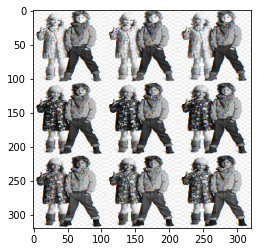

In [111]:
#to print image
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [112]:
yolo.setInput(blob)

In [113]:
output_layers_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layers_name)

In [115]:
#capture the bounding boxes
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
  for detection in output:
    score=detection[5:]   #get the place where there is a maximum probality of the image
    class_id=np.argmax(score)
    confidence=score[class_id]
    if confidence > 0.5:
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)

      x=int(center_x-w/2)
      y=int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)


In [116]:
len(boxes)

2

In [117]:
indexes=cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [118]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [121]:
from numpy.lib.function_base import blackman
if len(indexes)>0:
  for i in indexes.flatten():
    x,y,w,h=boxes[i]
    label=str(classes[class_ids[i]])
    confi=str(round(confidences[i],2))
    color=colors[class_ids[i]]

    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img, label+ " "+confi,(x,y+20),font,2,color,2)

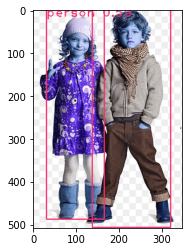

In [122]:
plt.imshow(img)

In [123]:
cv2.imwrite("./img.jpg",img)

True